In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
with open("kddcup.names.txt", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [14]:
cols ="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns =[]
for c in cols.split(',\n'):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(len(columns))

42


In [15]:
with open("training_attack_types.txt", 'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [16]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [17]:
path = "kddcup.data_10_percent_corrected"
df = pd.read_csv(path, names = columns)

# Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [18]:
df.shape

(494021, 43)

In [19]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [20]:
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

In [21]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

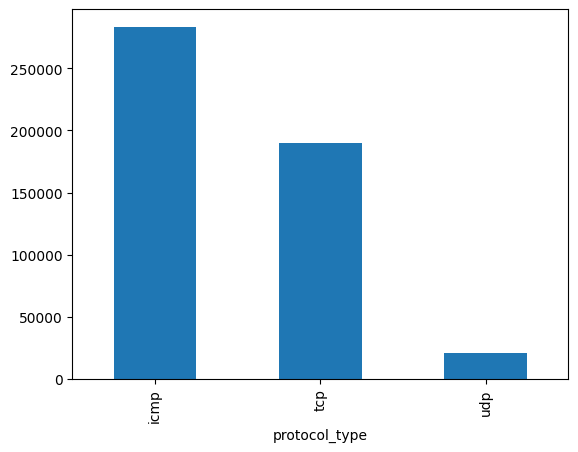

In [22]:
bar_graph('protocol_type')

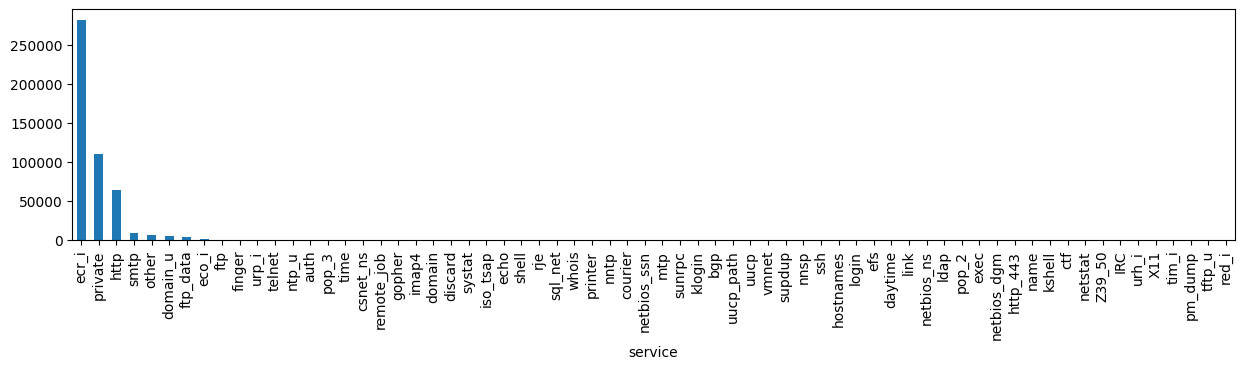

In [23]:
plt.figure(figsize=(15,3))
bar_graph('service')

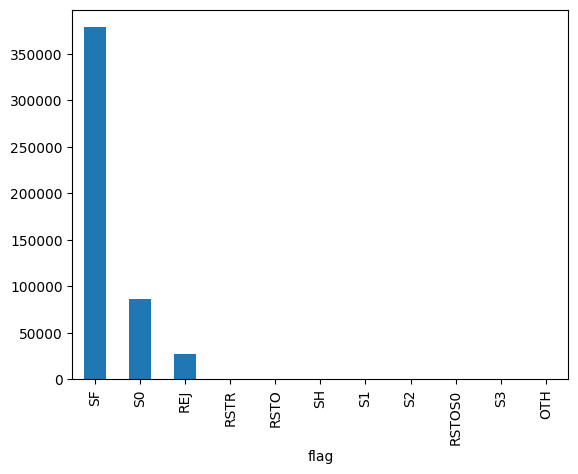

In [24]:
bar_graph('flag')

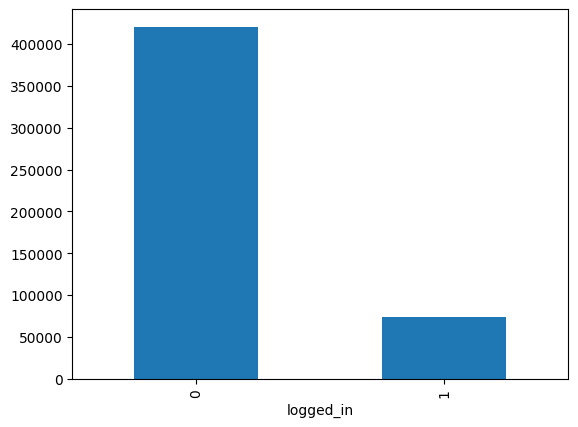

In [25]:
bar_graph('logged_in')

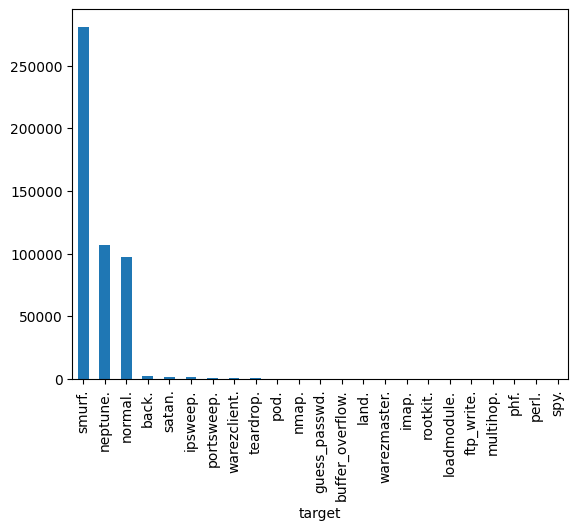

In [26]:
bar_graph('target')

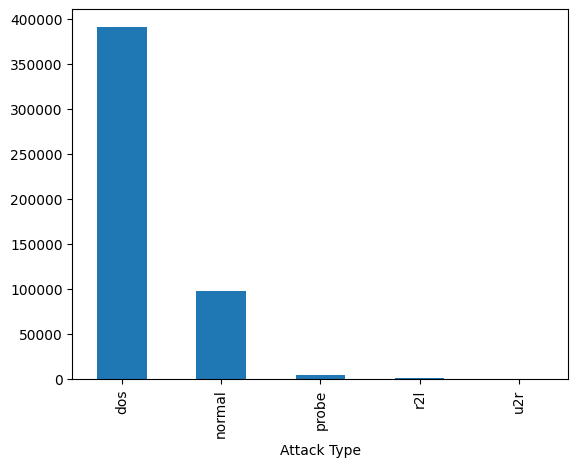

In [27]:
bar_graph('Attack Type')

In [28]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [29]:
df = df.drop(['target'], axis=1)

In [30]:
df = df.dropna(axis='columns')

In [31]:
ndf = df[[col for col in df.columns if df[col].nunique() > 1 and pd.api.types.is_numeric_dtype(df[col])]]

In [32]:
y = df[['Attack Type']]
X = df.drop(['Attack Type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f"Shape of X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, y_test: {y_test.shape}")

Shape of X_train: (330994, 41), X_test: (163027, 41)
Shape of y_train: (330994, 1), y_test: (163027, 1)


In [33]:
pmap = {'icmp': 0, 'tcp': 1, 'udp': 2}
X_train['protocol_type'] = X_train['protocol_type'].map(pmap)
X_test['protocol_type'] = X_test['protocol_type'].map(pmap)

In [34]:
fmap = {'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'RSTO': 4, 'SH': 5, 'S1': 6, 'S2': 7, 'RSTOS0': 8, 'S3': 9, 'OTH': 10}
X_train['flag'] = X_train['flag'].map(fmap)
X_test['flag'] = X_test['flag'].map(fmap)

In [35]:
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])

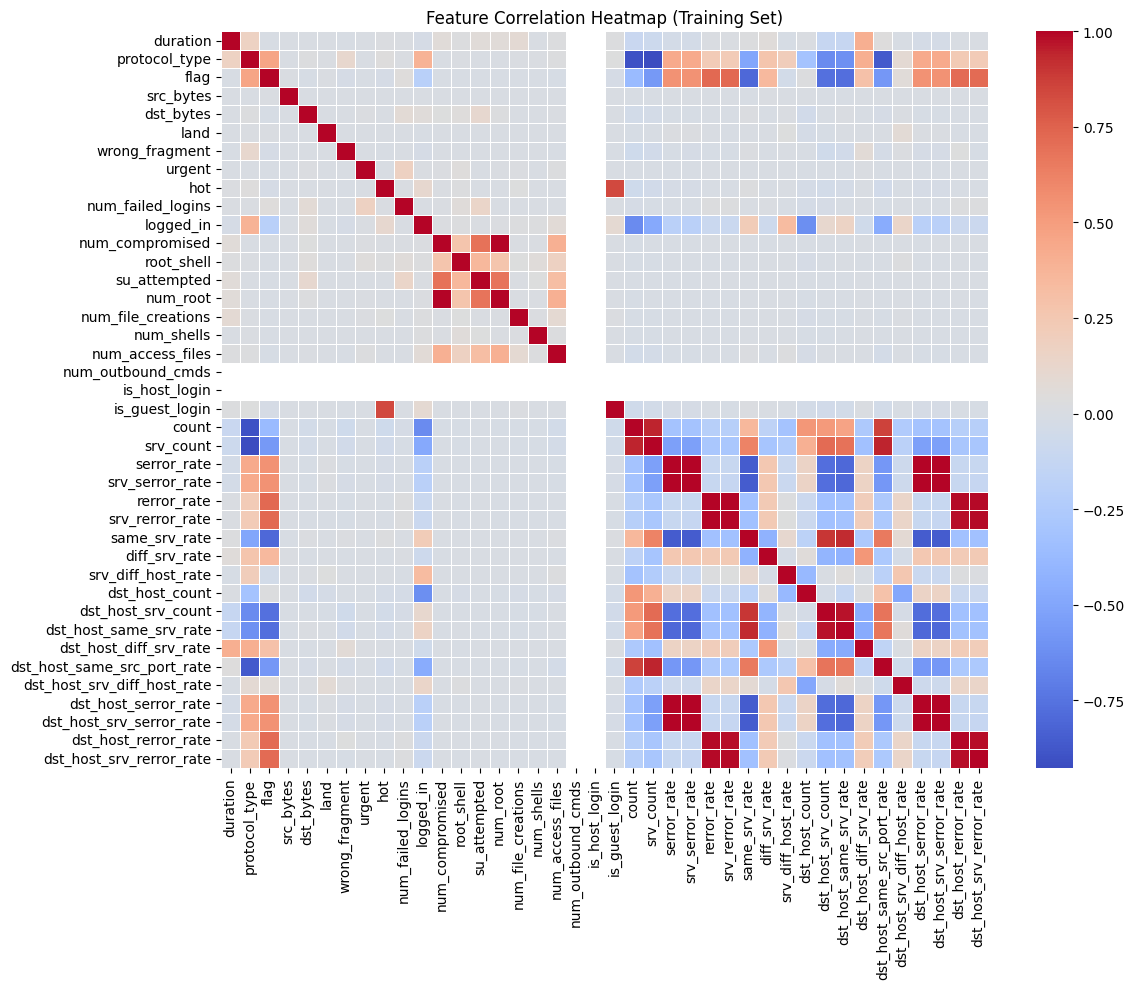

In [36]:
corr = X_train_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap (Training Set)')
plt.tight_layout()
plt.show()

In [37]:
highly_correlated = ['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate',
                     'dst_host_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
                     'dst_host_same_srv_rate']

In [38]:
X_train.drop(columns=highly_correlated, axis=1, inplace=True)
X_test.drop(columns=highly_correlated, axis=1, inplace=True)

In [39]:
print(X_train[['is_host_login', 'num_outbound_cmds']].nunique())

is_host_login        1
num_outbound_cmds    1
dtype: int64


In [40]:
X_train.drop(['is_host_login', 'num_outbound_cmds'], axis=1, inplace=True)
X_test.drop(['is_host_login', 'num_outbound_cmds'], axis=1, inplace=True)

In [41]:
print(f"Shape of X_train after dropping correlated columns: {X_train.shape}")
print(f"Shape of X_test after dropping correlated columns: {X_test.shape}")

Shape of X_train after dropping correlated columns: (330994, 31)
Shape of X_test after dropping correlated columns: (163027, 31)


In [42]:
X_train.drop('service', axis=1, inplace=True)
X_test.drop('service', axis=1, inplace=True)

In [43]:
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])

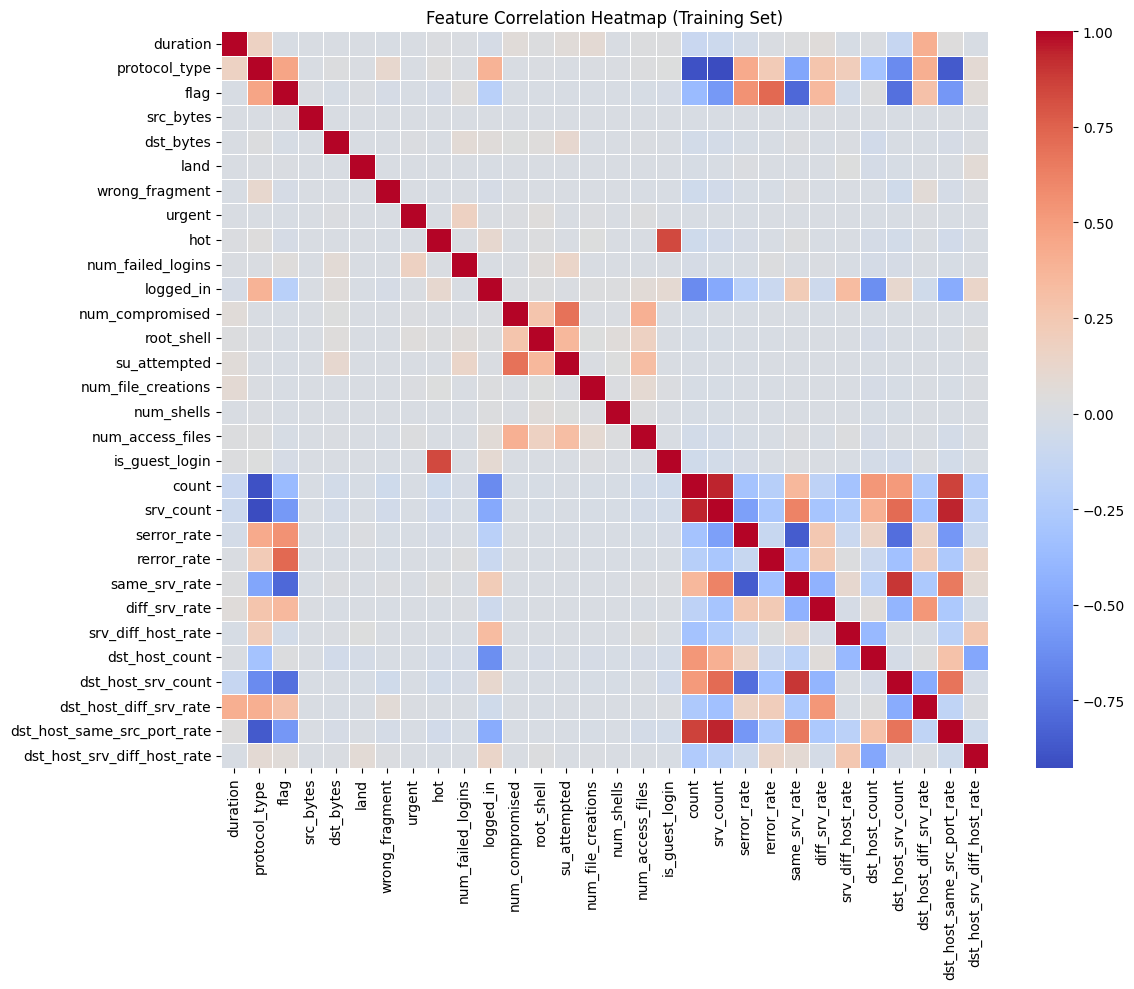

In [44]:
corr = X_train_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap (Training Set)')
plt.tight_layout()
plt.show()

In [45]:
X_train.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
482186,1470,2,0,147,105,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,255,1,0.82,1.00,0.00
302290,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,255,255,0.00,1.00,0.00
9330,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,255,255,0.00,1.00,0.00
91417,6,1,0,2872,335,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,188,186,0.02,0.01,0.01
293169,0,0,0,1032,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,255,255,0.00,1.00,0.00


In [46]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(f"Shape of X_train after scaling: {X_train.shape}")
print(f"Shape of X_test after scaling: {X_test.shape}")

Shape of X_train after scaling: (330994, 30)
Shape of X_test after scaling: (163027, 30)


### Modelling

In [47]:
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=4),
    "Random Forest": RandomForestClassifier(n_estimators=30),
    "SVM": SVC(gamma='scale'),
    "Logistic Regression": LogisticRegression(max_iter=1200000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
}

In [48]:
train_scores = []
test_scores = []
train_times = []
test_times = []

In [ ]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    start = time.time()
    model.fit(X_train, y_train.values.ravel())
    end = time.time()
    train_time = end - start

    start = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    end = time.time()
    test_time = end - start

    train_score = accuracy_score(y_train, y_pred_train) * 100
    test_score = accuracy_score(y_test, y_pred_test) * 100

    train_scores.append(train_score)
    test_scores.append(test_score)
    train_times.append(train_time)
    test_times.append(test_time)

    print(f"{name} - Train Accuracy: {train_score:.2f}%, Test Accuracy: {test_score:.2f}%")
    print(f"Training Time: {train_time:.4f}s, Testing Time: {test_time:.4f}s")


Training Naive Bayes...
Naive Bayes - Train Accuracy: 87.95%, Test Accuracy: 87.90%
Training Time: 0.6410s, Testing Time: 1.3551s

Training Decision Tree...
Decision Tree - Train Accuracy: 99.39%, Test Accuracy: 99.38%
Training Time: 1.2559s, Testing Time: 0.0988s

Training Random Forest...
Random Forest - Train Accuracy: 100.00%, Test Accuracy: 99.98%
Training Time: 9.1309s, Testing Time: 1.1684s

Training SVM...
